In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import datetime as dt 
from sklearn.cluster import DBSCAN

In [91]:
df = pd.read_json("contacttracing.json")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [93]:
df.describe()

,latitude,longitude
count,100.000000,100.000000
mean,13.134709,77.639229
std,0.069591,0.046132
min,13.010284,77.553381
25%,13.081266,77.596577
50%,13.133868,77.646240
75%,13.195195,77.681645
max,13.249645,77.705454


In [94]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [95]:
df['id'].unique()

array(['David', 'Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice',
       'Judy', 'Heidi'], dtype=object)

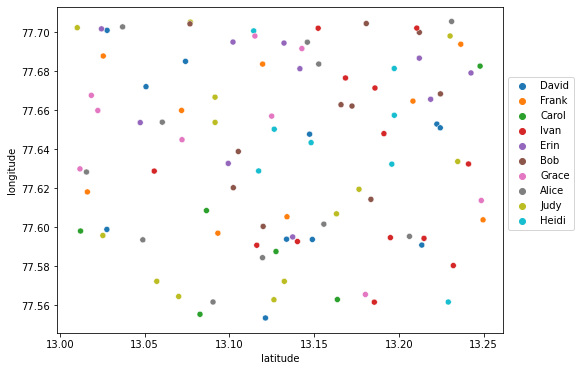

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])

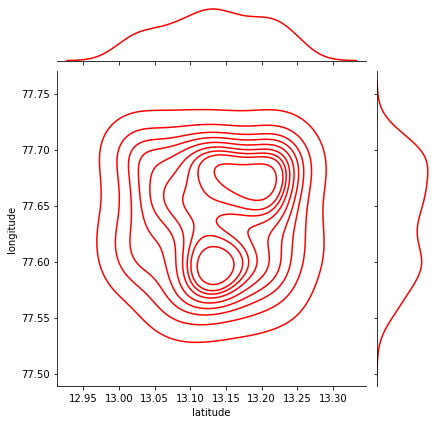

In [97]:
sns.jointplot(x='latitude', y='longitude', data=df, color='red', kind='kde')

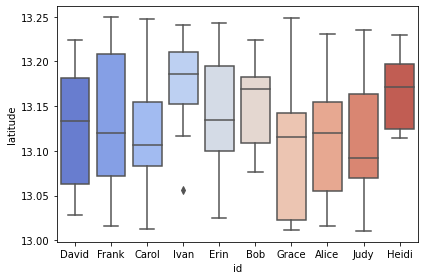

In [98]:
sns.boxplot(x= 'id', y= 'latitude', data = df, palette = 'coolwarm')
plt.tight_layout()

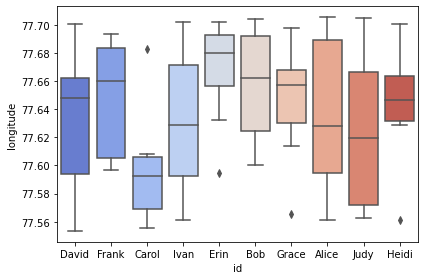

In [12]:
sns.boxplot(x='id', y='longitude', data=df, palette='coolwarm')
plt.tight_layout()

In [115]:
epsilon = 0.0018288 #distance of 6ft in km
model = DBSCAN(eps = epsilon, min_samples = 2, metric = "haversine").fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

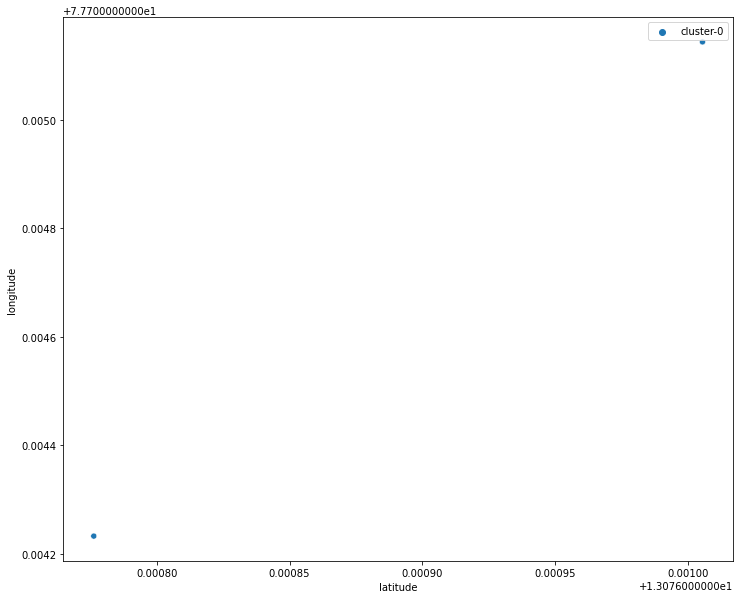

In [118]:
labels = model.labels_
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

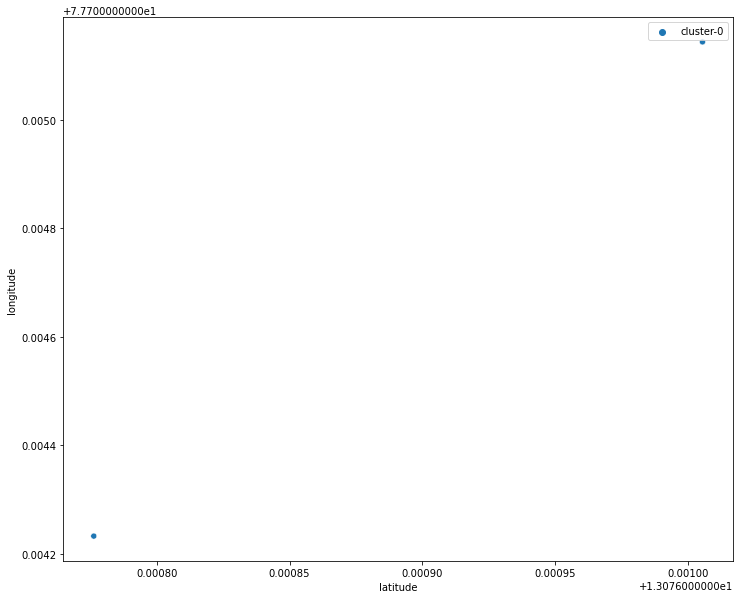

In [125]:
ids = df[(df['cluster'] == -1)].index 
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [45]:
def get_infected_names(input_name):
    df = pd.read_json("contacttracing.json")
    epsilon - 0.0018288 #6ft in km
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass 
            else:
                input_name_clusters.append(df['cluster'][i])
                
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [122]:
get_infected_names('Alice')

[]